<a href="https://colab.research.google.com/github/sanchitno1/ML_Project-/blob/master/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:- Exploratory Data Analysis of Car Features**


**1. Importing necessary libraries and check statistical summary**

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
#Loading the CSV file into a pandas dataframe.

df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#Extract the names of all the columns exists in this dataset
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.info()
#Gives the information about the datatype with reference to column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.shape
#Provides the size of dataset in form of rows and columns number

(11914, 16)

In [ ]:
df['Market Category'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Market Category, Length: 11914, dtype: bool

In [ ]:
df['Market Category'].isnull().sum()
#Gives the total number of NULL values for the column

3742

In [ ]:
df.dropna(subset=['MSRP'],axis=0,how='any',inplace=True)
#Drop the null values if exists in MSRP

In [ ]:
df.drop(df[df['MSRP']==0].index,inplace=True)
#Check for the null values

In [ ]:
df.drop(['Market Category'],axis=1,inplace=True)
#Dropping the column

In [ ]:
df.shape

(11914, 15)

In [ ]:
#Filling of the Null Values with unknown for the certain columns
df['Engine Fuel Type'].fillna(value='Unknown',inplace=True)
df['Number of Doors'].fillna(value='Unknown',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  object 
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 1.5+ MB


In [ ]:
df.describe()
#Provides all the mean, std,min,max i.e all statistical measures for the particular column

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


**2. Dropping irrelevant columns**

In [ ]:
df = df.drop(['Engine Fuel Type', 'Number of Doors'], axis=1)
df.head(5)
#Dropping of column can be made so that it will no affect on the further analysis of model on the price of the car

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df.shape

(10439, 13)

**3. Renaming the columns**

In [ ]:
#Renaming the Columns
df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'MRP'},inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10439 non-null  object 
 1   Model          10439 non-null  object 
 2   Year           10439 non-null  int64  
 3   HP             10370 non-null  float64
 4   Cylinders      10409 non-null  float64
 5   Transmission   10439 non-null  object 
 6   Drive Mode     10439 non-null  object 
 7   Vehicle Size   10439 non-null  object 
 8   Vehicle Style  10439 non-null  object 
 9   MPG-H          10439 non-null  int64  
 10  MPG-C          10439 non-null  int64  
 11  Popularity     10439 non-null  int64  
 12  MRP            10439 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10439, 13)

**4.Dropping the NULL Values**

In [ ]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
MRP               0
dtype: int64

In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make             10341
Model            10341
Year             10341
HP               10341
Cylinders        10341
Transmission     10341
Drive Mode       10341
Vehicle Size     10341
Vehicle Style    10341
MPG-H            10341
MPG-C            10341
Popularity       10341
MRP              10341
dtype: int64

In [ ]:
# Dropping the missing values.
df = df.dropna() 
df.count()

Make             10341
Model            10341
Year             10341
HP               10341
Cylinders        10341
Transmission     10341
Drive Mode       10341
Vehicle Size     10341
Vehicle Style    10341
MPG-H            10341
MPG-C            10341
Popularity       10341
MRP              10341
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10341 non-null  object 
 1   Model          10341 non-null  object 
 2   Year           10341 non-null  int64  
 3   HP             10341 non-null  float64
 4   Cylinders      10341 non-null  float64
 5   Transmission   10341 non-null  object 
 6   Drive Mode     10341 non-null  object 
 7   Vehicle Size   10341 non-null  object 
 8   Vehicle Style  10341 non-null  object 
 9   MPG-H          10341 non-null  int64  
 10  MPG-C          10341 non-null  int64  
 11  Popularity     10341 non-null  int64  
 12  MRP            10341 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


**5.Plotting of graphs and check for outliers**



* Plotting of the boxplot of different variables like MRP, HP, Cylinders, MPG-C etc which affect the prediction of price of the cars in the model.
* After plotting the boxplot of different variables we come to know about the affecting outliers and can remove them and make our model more accurate.



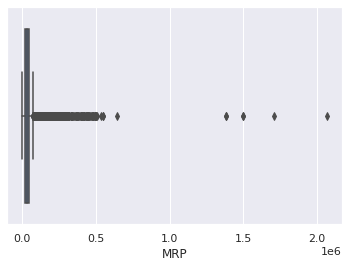

In [ ]:
#Plotting of boxplot
sns.boxplot(x=df['MRP'])

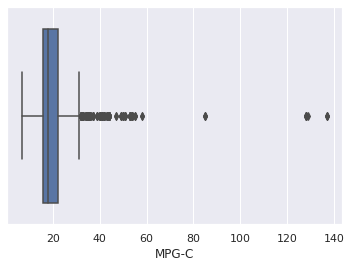

In [ ]:
sns.boxplot(x=df['MPG-C'])

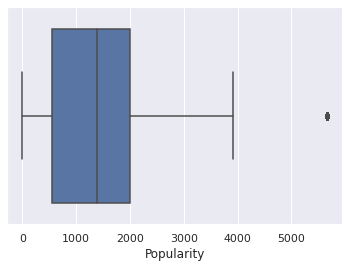

In [ ]:
sns.boxplot(x=df['Popularity'])

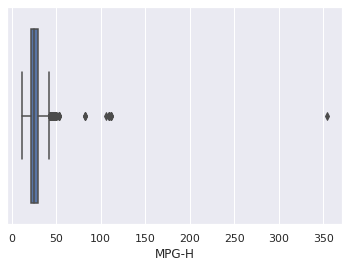

In [ ]:
sns.boxplot(x=df['MPG-H'])

In [ ]:
df.isnull().sum()


Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
MRP              0
dtype: int64

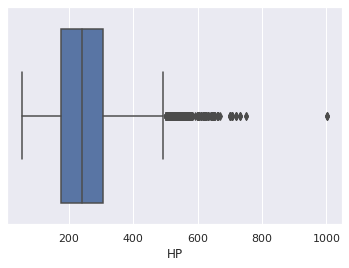

In [ ]:
sns.boxplot(x=df['HP'])

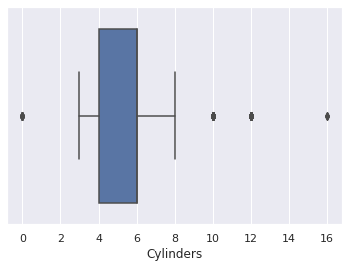

In [ ]:
sns.boxplot(x=df['Cylinders'])

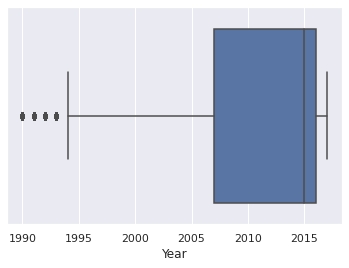

In [ ]:
sns.boxplot(x=df['Year'])

**InterQuartile Range (IQR)**


*   The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles.
*    Due to its resistance to outliers, the interquartile range is useful in identifying when a value is an outlier. The interquartile range rule is what informs us whether we have a mild or strong outlier





In [ ]:
#Finding Inter Quartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQ_Range = Q3 - Q1
print(IQ_Range)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
MRP           21895.0
dtype: float64


In [ ]:
#Removing of Outliers
df = df[~((df < (Q1 - 1.5 * IQ_Range)) |(df > (Q3 + 1.5 * IQ_Range))).any(axis=1)]

In [ ]:
df.shape

(8074, 13)

**6. Most represented car brands in the dataset and their average price**

In [ ]:
#Checking for the Columns Name with values used for counting of cars.
df.head() 

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

In [ ]:
# Top 10 car brands
popular_labels = counts.index[:10]

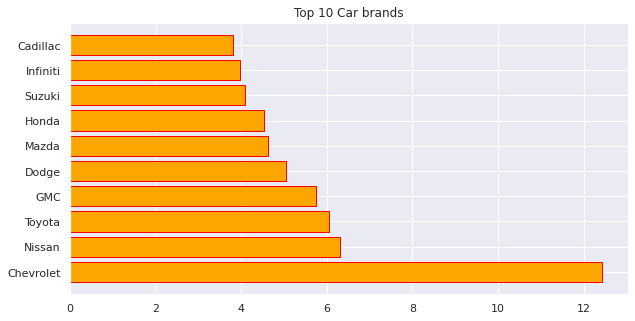

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10],edgecolor='red',color='orange')
plt.title('Top 10 Car brands')
plt.show()

In [ ]:
#Prices among top car brands
priceofcar = df[['Make','MRP']].loc[(df['Make'] == 'Chevrolet')|
                                (df['Make'] == 'Ford')|
                                (df['Make'] == 'Volkswagen')|
                                (df['Make'] == 'Toyota')|
                                (df['Make'] == 'Dodge')|
                                (df['Make'] == 'Nissan')|
                                (df['Make'] == 'GMC')|
                                (df['Make'] == 'Honda')|
                                (df['Make'] == 'Mazda')].groupby('Make').mean()
priceofcar

,MRP
Make,
Chevrolet,28572.635095
Dodge,26178.358722
GMC,33666.516199
Honda,27246.472678
Mazda,20628.445040
Nissan,28559.636542
Toyota,26228.171779
Volkswagen,30449.461017


**7. Correlation Matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

In [ ]:
#Plotting Correlation Matrix
Corr_Matrix = df.corr()
Corr_Matrix

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,MRP
Year,1.000000,0.321378,-0.106957,0.382672,0.340269,0.199974,0.580207
HP,0.321378,1.000000,0.732403,-0.439438,-0.547024,0.083655,0.753011
Cylinders,-0.106957,0.732403,1.000000,-0.677483,-0.736849,-0.000936,0.401774
MPG-H,0.382672,-0.439438,-0.677483,1.000000,0.935214,0.112745,-0.122202
MPG-C,0.340269,-0.547024,-0.736849,0.935214,1.000000,0.097936,-0.202485
Popularity,0.199974,0.083655,-0.000936,0.112745,0.097936,1.000000,0.111579
MRP,0.580207,0.753011,0.401774,-0.122202,-0.202485,0.111579,1.000000


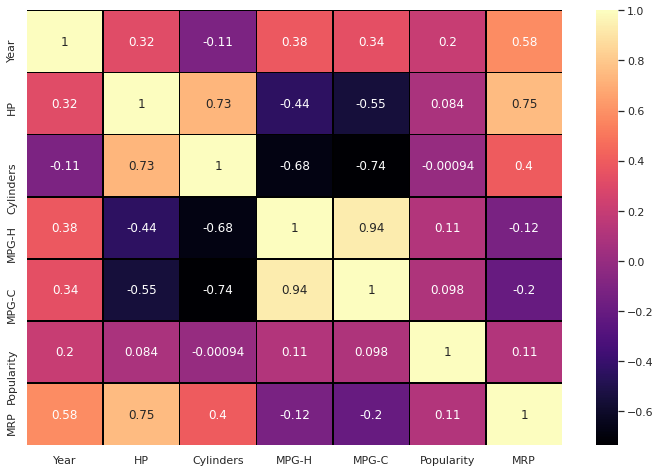

In [ ]:
#Plotting of Heat Map using Corr_Matrix(Correlation Matrix)
plt.subplots(figsize=(12,8))
sns.heatmap(Corr_Matrix, annot=True, linecolor='black',cmap='magma',linewidths=.5)

# **From the above HeatMap plotted, we can conclude that:**



1. The features HP and Cylinders are positively dependent on each other.
2. MRP is positively dependent on features and Horse Power(HP), Cylinder and Year.
3. MPG-H and MPG-C have strong negative correlation with Cylinders.



**8. Perform EDA and plot different graphs among different variables**

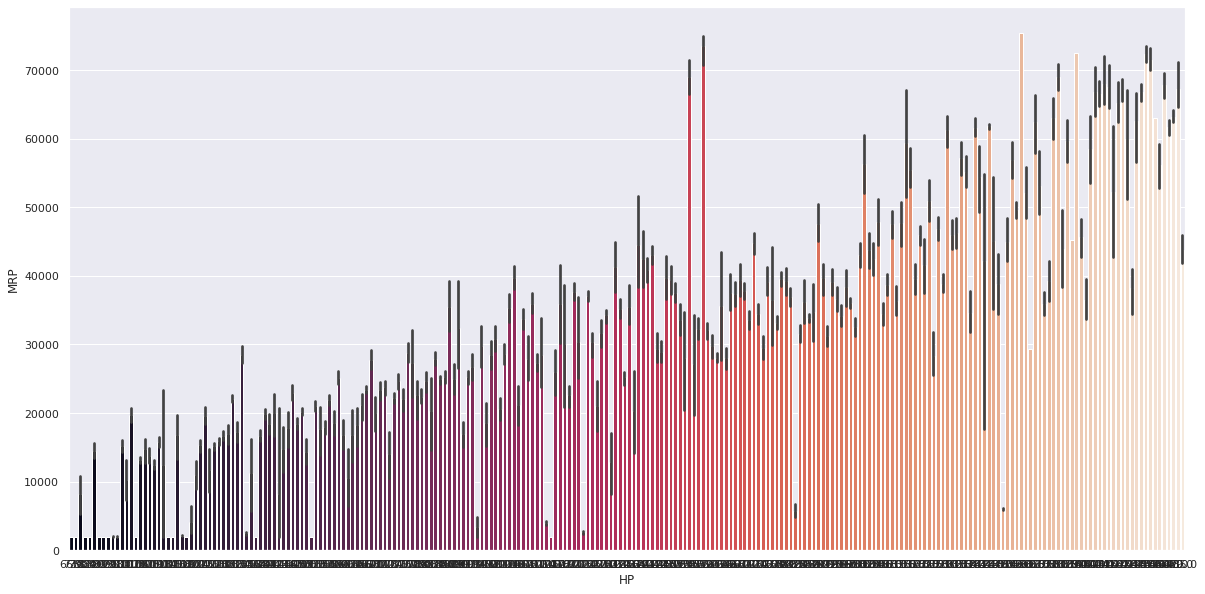

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['HP'],df['MRP'],palette='rocket')

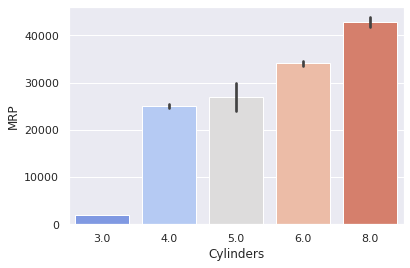

In [ ]:
sns.barplot(df['Cylinders'],df['MRP'],palette='coolwarm')

From the above graph we can say that Cylinders and MRP are dependent on each other. On increasing the number of Cylinders, MRP will also increase.

---



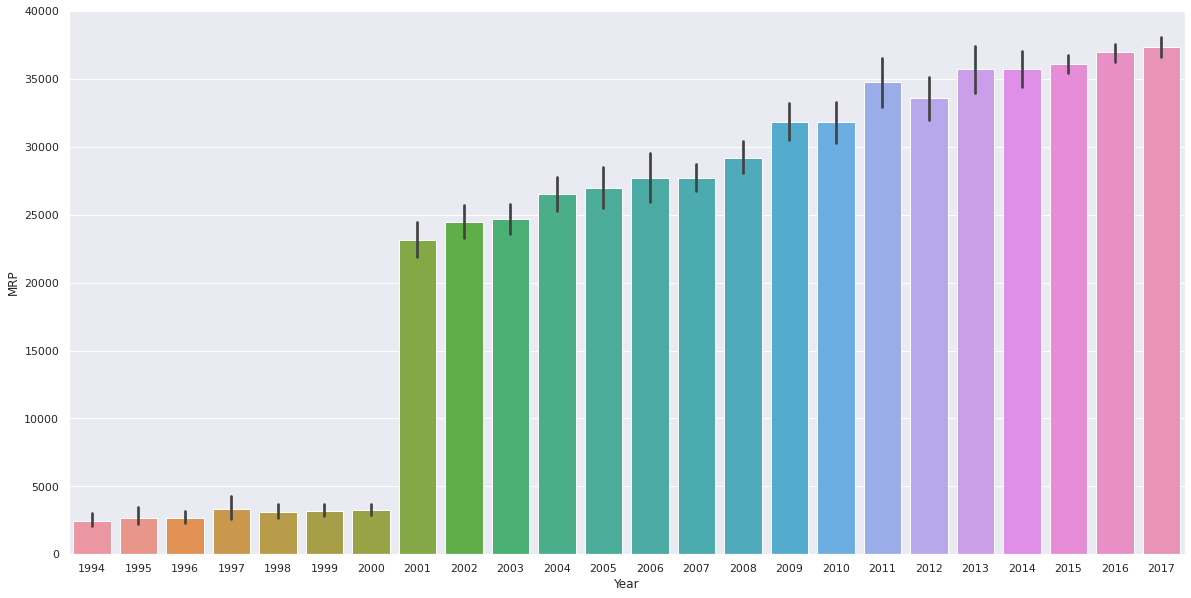

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['Year'],df['MRP'])

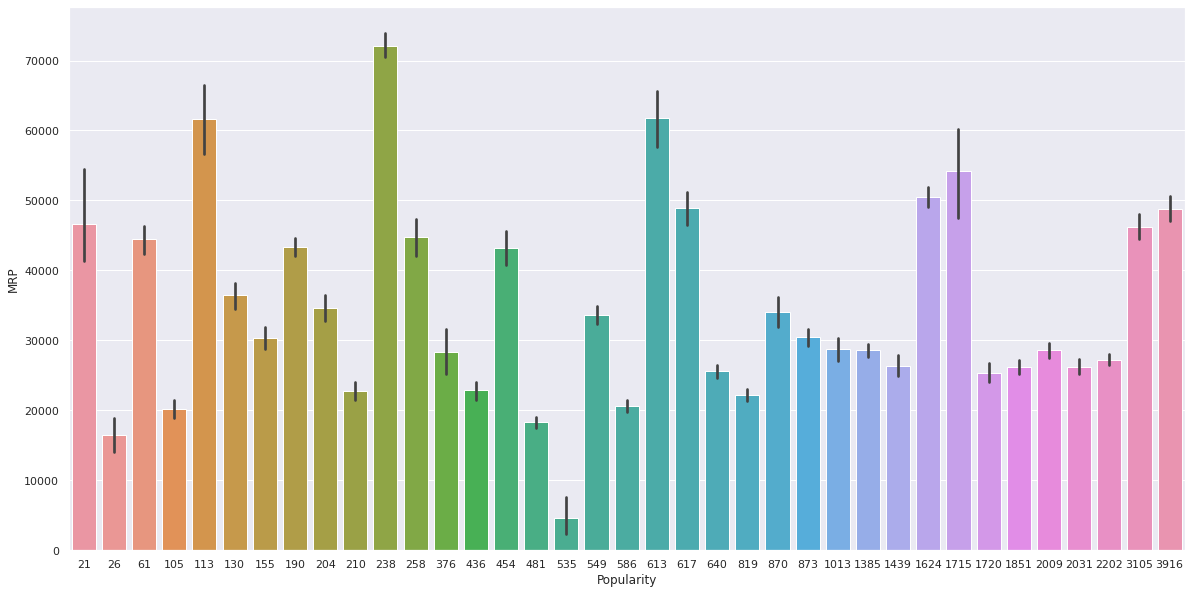

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['Popularity'],df['MRP'])

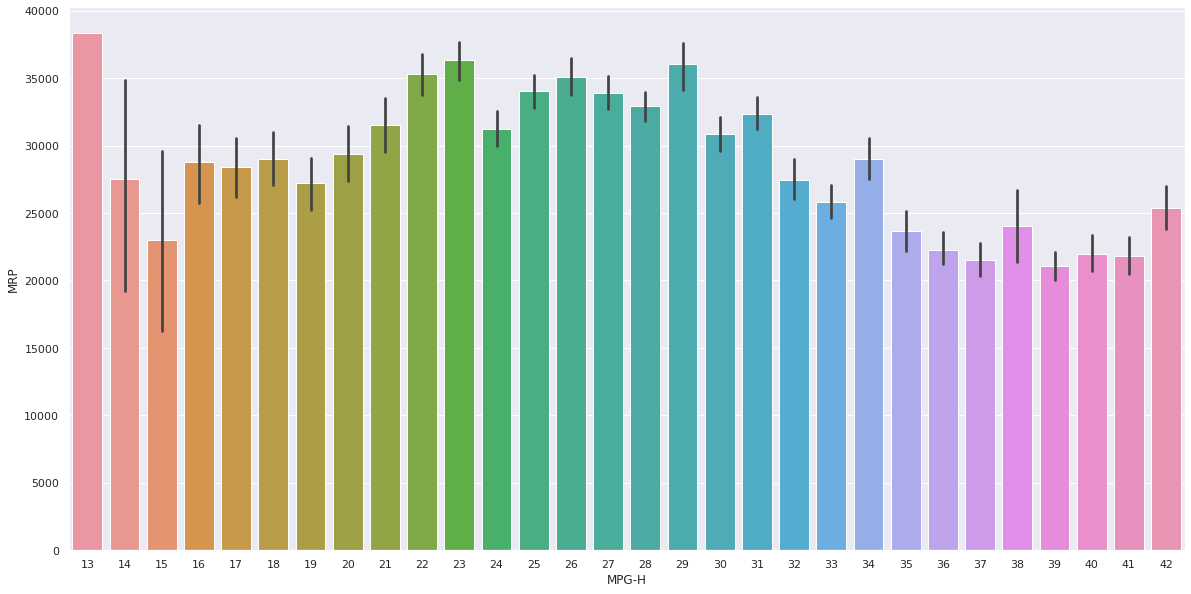

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['MPG-H'],df['MRP'])

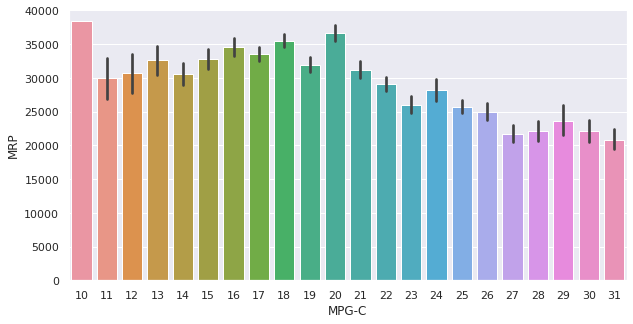

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df['MPG-C'],df['MRP'])

**Which vehicle type solds the most?**



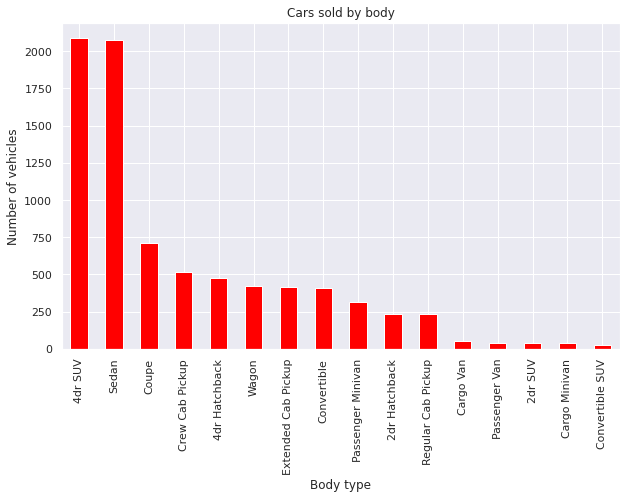

In [ ]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6),color='red')                      
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

In [ ]:
df.info

<bound method DataFrame.info of           Make       Model  Year     HP  ...  MPG-H MPG-C Popularity    MRP
0          BMW  1 Series M  2011  335.0  ...     26    19       3916  46135
1          BMW    1 Series  2011  300.0  ...     28    19       3916  40650
2          BMW    1 Series  2011  300.0  ...     28    20       3916  36350
3          BMW    1 Series  2011  230.0  ...     28    18       3916  29450
4          BMW    1 Series  2011  230.0  ...     28    18       3916  34500
...        ...         ...   ...    ...  ...    ...   ...        ...    ...
11909    Acura         ZDX  2012  300.0  ...     23    16        204  46120
11910    Acura         ZDX  2012  300.0  ...     23    16        204  56670
11911    Acura         ZDX  2012  300.0  ...     23    16        204  50620
11912    Acura         ZDX  2013  300.0  ...     23    16        204  50920
11913  Lincoln      Zephyr  2006  221.0  ...     26    17         61  28995

[8074 rows x 13 columns]>

In [ ]:
df.dtypes

Make              object
Model             object
Year               int64
HP               float64
Cylinders        float64
Transmission      object
Drive Mode        object
Vehicle Size      object
Vehicle Style     object
MPG-H              int64
MPG-C              int64
Popularity         int64
MRP                int64
dtype: object

In [ ]:
#Checking for names of columns having datatypes other than int
ddt = df.select_dtypes(exclude=[np.number]).columns
ddt

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

**Now we can done preprocessing on the columns and make the encoded form using LabelEncoder.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc = LabelEncoder()
for i in ddt:
  df[i] = label_enc.fit_transform(df[i])

In [ ]:
print("Data Encoded Successfully")
df.head(10)

Data Encoded Successfully


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500
5,3,0,2012,230.0,6.0,2,3,0,8,28,18,3916,31200
6,3,0,2012,300.0,6.0,2,3,0,6,26,17,3916,44100
7,3,0,2012,300.0,6.0,2,3,0,8,28,20,3916,39300
8,3,0,2012,230.0,6.0,2,3,0,6,28,18,3916,36900
9,3,0,2013,230.0,6.0,2,3,0,6,27,18,3916,37200


***9. Machine Learning Model***
Splitting the model into 80 and 20 ratio.


In [ ]:
y = df['MRP'].values
X=df[['Make','Model','Transmission','Drive Mode','Vehicle Size','Vehicle Style','MPG-H','MPG-C','Popularity']].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

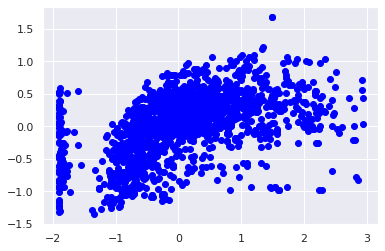

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,color='blue')

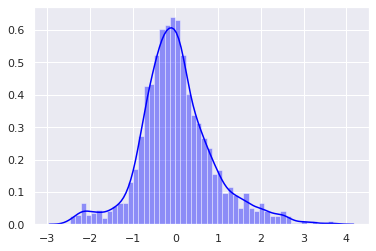

In [ ]:
sns.distplot((y_test-y_pred),bins=50,color='blue')

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6288361781877723
Root Mean Squared Error: 0.8620517261162959
R2 Score: 0.23130079934684578


**10. Other Algorithms and their performance**

**10.1 Using Support Vector Regression (SVR)**


*   Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.




In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

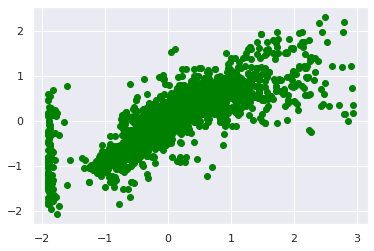

In [ ]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,color='green')

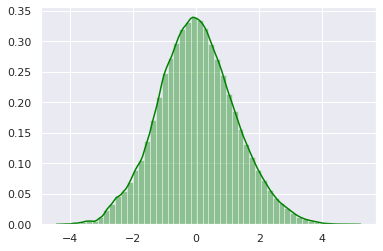

In [ ]:
sns.distplot((y_test-y_pred),bins=50,color='green')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.39715970910332793
Root Mean Squared Error: 0.6040969317664816
R2 Score: 0.6225120978841696


**10.2 Random Forest Regression Analysis**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

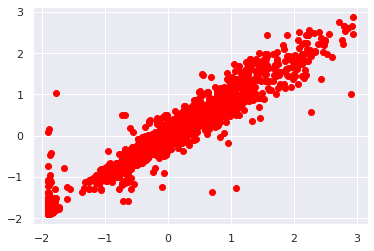

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,color='red')

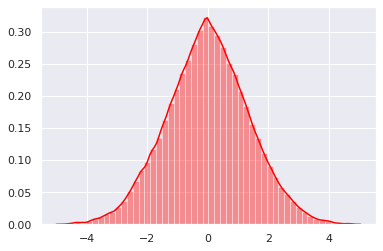

In [ ]:
sns.distplot((y_test-y_pred),bins=50,color='red')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.19962225548294205
Root Mean Squared Error: 0.30089472258296035
R2 Score: 0.9063475983060403
